In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('Datos_Vivienda.xlsx', sheet_name='Datos Vivienda')
df

,Zona,piso,Estrato,precio_millon,Area_contruida,parqueaderos,Banos,Habitaciones,Tipo,Barrio,cordenada_longitud,Cordenada_latitud
0,Zona Sur,2.0,6.0,880.0,237.0,2.0,5.0,4.0,Casa,pance,-76.46300,3.43000
1,Zona Oeste,2.0,4.0,1200.0,800.0,3.0,6.0,7.0,Casa,miraflores,-76.46400,3.42800
2,Zona Sur,3.0,5.0,250.0,86.0,NaN,2.0,3.0,Apartamento,multicentro,-76.46400,3.42900
3,Zona Sur,NaN,6.0,1280.0,346.0,4.0,6.0,5.0,Apartamento,ciudad jard√≠n,-76.46400,3.43300
4,Zona Sur,2.0,6.0,1300.0,600.0,4.0,7.0,5.0,Casa,pance,-76.46438,3.43463
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,Zona Norte,NaN,4.0,580.0,295.0,2.0,5.0,5.0,Casa,la flora,-76.58876,3.46348
8318,Zona Norte,NaN,5.0,1400.0,838.0,1.0,5.0,5.0,Casa,la flora,-76.58915,3.46467
8319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# eliminar los registros que tengan más de 6 datos faltantes en sus columnas 
df = df.dropna(thresh=len(df.columns)-6)

In [4]:
df.shape

(8319, 12)

In [5]:
# Missing values by column
df.isnull().sum()

Zona                     0
piso                  2635
Estrato                  0
precio_millon            0
Area_contruida           0
parqueaderos          1602
Banos                    0
Habitaciones             0
Tipo                     0
Barrio                   0
cordenada_longitud       0
Cordenada_latitud        0
dtype: int64

Un valor nulo en parqueaderos lo tomaremos como que no hay parqueadero por lo que su valor es 0. Como los valores faltantes en la columna 'piso' corresponden al 31\% de los datos, y esta variable no sera utilizada en el estudio, se decide borrar de los datos

In [6]:
df['parqueaderos'].fillna(0, inplace=True)
df.drop('piso', axis=1, inplace=True)

/home/suribe06/.local/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/suribe06/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.dtypes

Zona                   object
Estrato               float64
precio_millon         float64
Area_contruida        float64
parqueaderos          float64
Banos                 float64
Habitaciones          float64
Tipo                   object
Barrio                 object
cordenada_longitud    float64
Cordenada_latitud     float64
dtype: object

# Estadistica Descriptiva

In [8]:
df.describe()

,Estrato,precio_millon,Area_contruida,parqueaderos,Banos,Habitaciones,cordenada_longitud,Cordenada_latitud
count,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000
mean,4.633610,433.904436,174.934938,1.481789,3.111311,3.605361,-76.528606,3.417644
std,1.029222,328.665025,142.964126,1.243158,1.428210,1.459537,0.017398,0.042638
min,3.000000,58.000000,30.000000,0.000000,0.000000,0.000000,-76.589150,3.333000
25%,4.000000,220.000000,80.000000,1.000000,2.000000,3.000000,-76.541580,3.380795
50%,5.000000,330.000000,123.000000,1.000000,3.000000,3.000000,-76.530000,3.416000
75%,5.000000,540.000000,229.000000,2.000000,4.000000,4.000000,-76.518890,3.452000
max,6.000000,1999.000000,1745.000000,10.000000,10.000000,10.000000,-76.463000,3.497700


In [9]:
#Separate attributes by type
obj_attributes = df.select_dtypes(include=['object']).columns.to_list()
float_attributes = df.select_dtypes(include=['float']).columns.to_list()

# Bar Diagrams and Pie Diagram

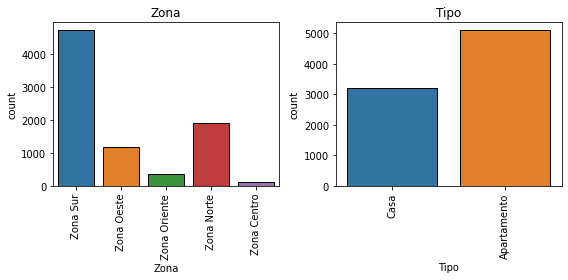

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs = axs.ravel()

for i, col in enumerate(obj_attributes):
  if col != 'Barrio':
    sns.countplot(x=col, data=df, ax=axs[i], edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

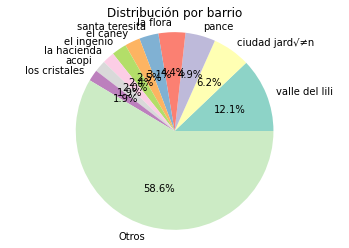

In [30]:
from matplotlib.colors import ListedColormap

# Obtain the housing count by neighborhood
count_by_barrio = df['Barrio'].value_counts()

# Create labels
labels_ = count_by_barrio.index[:10].tolist()

# Calculate the sum of the smallest values and add it to the list of labels
sum_low_values = count_by_barrio.iloc[10:].sum()
labels_.append('Otros')

# Create pie chart
fig = plt.figure(facecolor='white')
colores = sns.color_palette("Set3", n_colors=11)
paleta_colores = ListedColormap(colores)
plt.pie(count_by_barrio[:10].tolist() + [sum_low_values], labels=labels_, autopct='%1.1f%%', colors=paleta_colores.colors)
plt.axis('equal')
plt.title('Distribución por barrio')
plt.show()

# Histograms

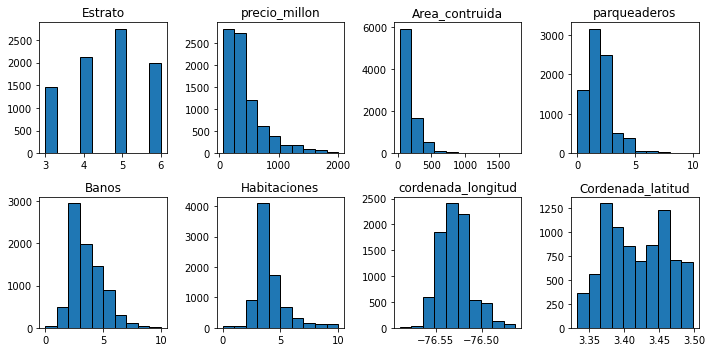

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs = axs[:8].ravel()

for i, col in enumerate(float_attributes):
    axs[i].hist(df[col], edgecolor='black')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Box Plots

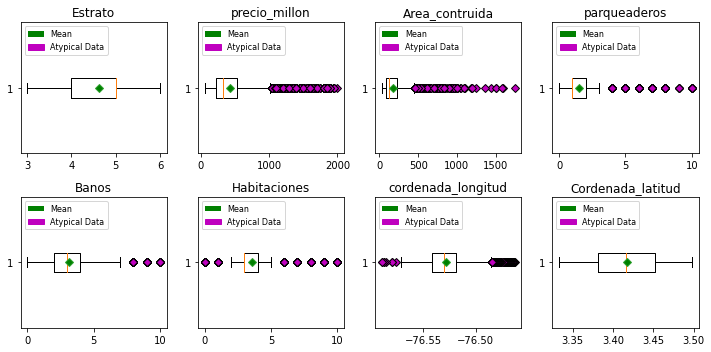

In [13]:
import matplotlib.patches as mpatches

fliers = dict(markerfacecolor='m', marker='D') #atypical data
mean_ = dict(markerfacecolor='green', marker='D')
mean_artist = mpatches.Patch(facecolor='green', label='Mean')
ad_artist = mpatches.Patch(color='m', label='Atypical Data')

fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs = axs[:8].ravel()
for i, col in enumerate(float_attributes):
  bp = axs[i].boxplot(df[col], vert=False, flierprops=fliers, showmeans=True, meanprops=mean_)
  axs[i].legend(handles=[mean_artist, ad_artist], loc='upper left', fontsize=8)
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Correlation

<Axes: >

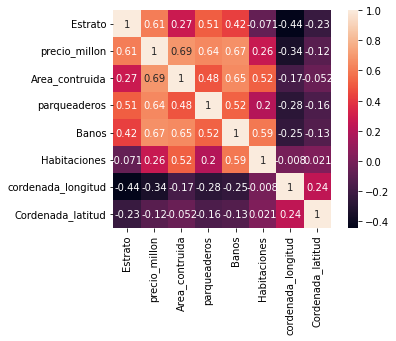

In [14]:
sns.heatmap(df.corr(), square=True, annot=True)

# Simple Linear Regression (precio_millon - Area_contruida)

In [15]:
df_el_ingenio = df[df['Barrio'] == 'el ingenio'][['precio_millon', 'Area_contruida']]
df_el_ingenio

,precio_millon,Area_contruida
36,1450.0,1200.0
122,290.0,100.0
220,360.0,99.0
581,550.0,197.0
2396,410.0,136.0
...,...,...
6516,176.0,83.0
6894,980.0,750.0
7436,395.0,300.0
7462,230.0,85.0


In [16]:
# Realiza el análisis de regresión lineal simple
modelo = smf.ols('precio_millon ~ Area_contruida', data=df_el_ingenio).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_millon   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     684.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.80e-66
Time:                        02:10:58   Log-Likelihood:                -1226.1
No. Observations:                 202   AIC:                             2456.
Df Residuals:                     200   BIC:                             2463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        195.7150     11.639     16.

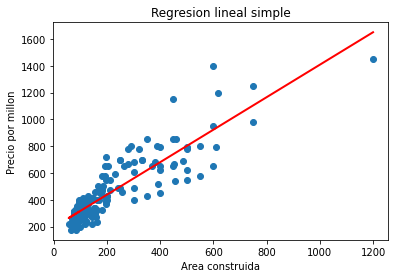

In [17]:
plt.scatter(df_el_ingenio.Area_contruida, df_el_ingenio.precio_millon)
plt.plot(df_el_ingenio.Area_contruida, modelo.predict(), color='red', linewidth=2)
plt.xlabel('Area construida')
plt.ylabel('Precio por millon')
plt.title('Regresion lineal simple')
plt.show()

# Check model assumptions

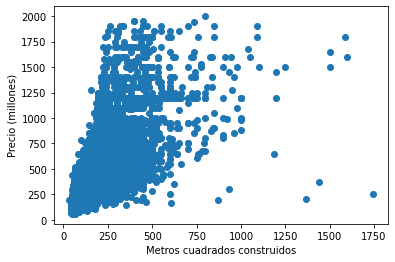

In [18]:
# Scatter plot between the independent and dependent variable (linearity)
plt.scatter(df['Area_contruida'], df['precio_millon'])
plt.xlabel('Metros cuadrados construidos')
plt.ylabel('Precio (millones)')
plt.show()

# Residuals

In [19]:
# Prueba de normalidad de los residuos (usando la prueba de Shapiro-Wilk)
from scipy.stats import shapiro
residuos = modelo.resid
stat, p = shapiro(residuos)
print('Estadística de prueba:', stat)
print('Valor p:', p)

Estadística de prueba: 0.9449506402015686
Valor p: 5.659239832311869e-07


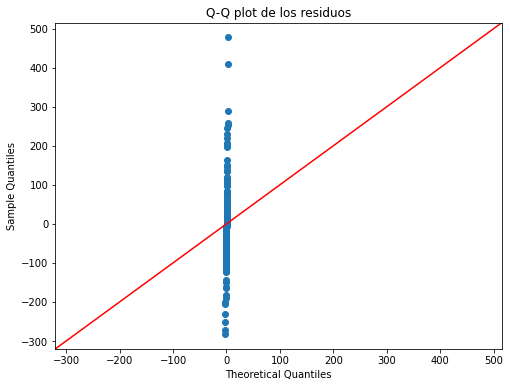

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuos, line='45', ax=ax)
ax.set_title('Q-Q plot de los residuos')
plt.show()

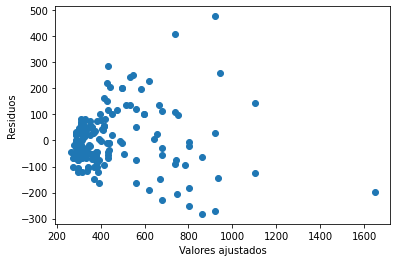

In [21]:
# Gráfico de residuos vs ajustados (para evaluar la linealidad de la relación entre las variables)
plt.scatter(modelo.fittedvalues, residuos)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

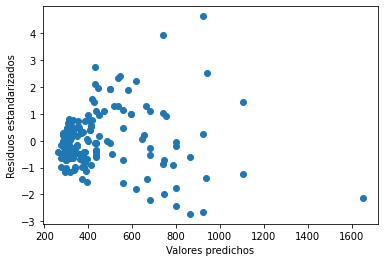

In [22]:
# Gráfico de residuos estandarizados vs ajustados (para evaluar la homocedasticidad de los residuos)
predicciones = modelo.predict()
residuos_estandarizados = modelo.get_influence().resid_studentized_internal
plt.scatter(predicciones, residuos_estandarizados)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos estandarizados')
plt.show()

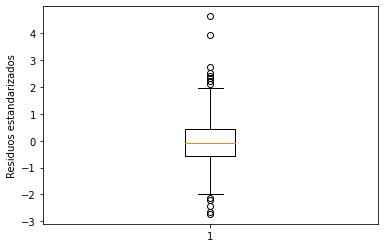

In [23]:
# Gráfico de caja de los residuos estandarizados
residuos_estandarizados = modelo.get_influence().resid_studentized_internal
plt.boxplot(residuos_estandarizados)
plt.ylabel('Residuos estandarizados')
plt.show()

eval_env: 1


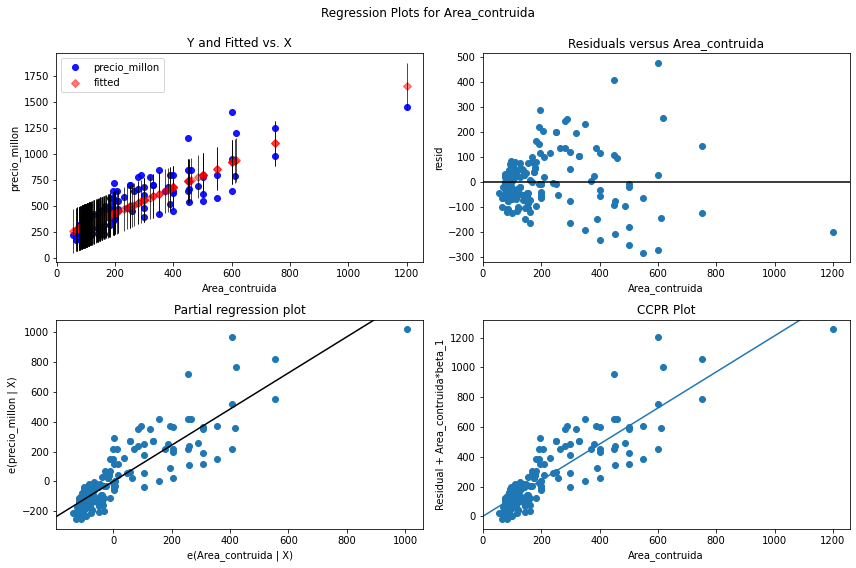

In [24]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(modelo,'Area_contruida', fig=fig)
plt.show()

In [25]:
# Prueba de homocedasticidad de los residuos (usando la prueba de Breusch-Pagan)
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuos, modelo.model.exog)
print('Estadística de prueba LM:', lm)
print('Valor p LM:', lm_pvalue)
print('Estadística de prueba F:', fvalue)
print('Valor p F:', f_pvalue)

Estadística de prueba LM: 46.49553687988353
Valor p LM: 9.18273677648706e-12
Estadística de prueba F: 59.79961725467512
Valor p F: 5.035974457263909e-13


In [26]:
# Evaluate the quality of the fit
print('Valor R cuadrado:', modelo.rsquared)

# Prueba F de significancia global del modelo
print('Estadística de prueba F:', modelo.fvalue)
print('Valor p F:', modelo.f_pvalue)


Valor R cuadrado: 0.7738048424553867
Estadística de prueba F: 684.1922266198526
Valor p F: 1.7958520516145784e-66


# Categorical Regression

In [27]:
#Add new column to df
edad_cat = []
for x in data['Age']:
  if x <= 26: edad_cat.append('Juventud')
  else: edad_cat.append('Adultez')
data['Edad_Cat'] = edad_cat

NameError: name 'data' is not defined

In [28]:
# Convertir la variable categórica en variables dummy
df2 = df[df['Barrio'] == 'el ingenio'][['precio_millon', 'Area_contruida', 'Tipo']]

df_dummies = pd.get_dummies(df2['Tipo'], prefix='Tipo')

# Unir los datos originales con las variables dummy
df_el_ingenio = pd.concat([df_el_ingenio, df_dummies], axis=1)

# Ajustar el modelo de regresión lineal
modelo2 = smf.ols(formula='precio_millon ~ Area_contruida + Tipo_Apartamento + Tipo_Casa', data=df_el_ingenio).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_millon   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     403.1
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.02e-70
Time:                        02:11:35   Log-Likelihood:                -1212.7
No. Observations:                 202   AIC:                             2431.
Df Residuals:                     199   BIC:                             2441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          163.8297      9.600  

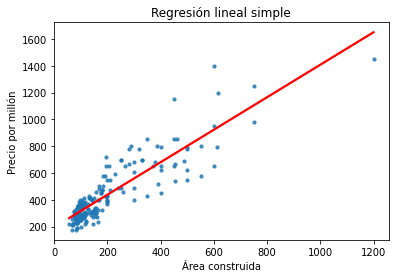

In [29]:
# Graficar el modelo
sns.regplot(x='Area_contruida', y='precio_millon', data=df_el_ingenio, ci=None, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Área construida')
plt.ylabel('Precio por millón')
plt.title('Regresión lineal simple')
plt.show()